# Concatenating COSA Datasets LOL

## Imports

In [1]:
import pandas as pd

In [ ]:
#initial dataset 
#air1 = pd.read_csv('med_center_air1.csv')

In [ ]:
#additional dataset
#air2 = pd.read_csv('med_center_air.csv')

In [ ]:
#check out datatypes and nulls
#air1.info()

In [ ]:
#checkout datatypes and nulls
#air2.info()

- O3 is a float in air 2, need to make them both floats

In [ ]:
#air1.astype({'O3': 'float64'}).dtypes

In [ ]:
#air1.astype({'O3': 'float64'})

In [ ]:
#air1.info()

In [ ]:
#air1.O3 = air1.O3.astype('float64')

In [ ]:
#air1.info()

In [ ]:
#air1.info()

## Full cosa dataset

In [2]:
import wrangle

In [3]:
def full_daily_COSA_dataframe():
    sound_df = wrangle.wrangle_sound()
    sound_df = sound_df.set_index('DateTime')
    sound_df = sound_df.sort_index()
    flood_df = wrangle.clean_flood()
    flood_df = flood_df.set_index('datetime')
    weather_df = wrangle.wrangle_weather()
    air_df = wrangle.clean_air()
    air_df.datetime = pd.to_datetime(air_df.datetime)
    air_df = air_df.set_index('datetime')
    air_df = air_df.sort_index()
    weather_day_df = weather_df.resample('D', on='datetime').mean()
    flood_day_df = flood_df.resample('D').mean()
    sound_day_df = sound_df.resample('D').mean()
    air_day_df = air_df.resample('D').mean().drop(columns = ['hour', 'weekday', 'CO_24hr', 'Pm_25_24hr', 'Pm_10_24hr', 'SO2', 'O3', 'NO2'])
    air2_5 = air_df.drop(air_df.columns.difference(['Pm2_5', 'AQI_pm2_5']), 1)
    air10 = air_df.drop(air_df.columns.difference(['Pm10', 'AQI_pm10']), 1)
    airCO = air_df.drop(air_df.columns.difference(['CO', 'AQI_CO']), 1)
    series2_5 = air2_5.resample('D').max().rename(columns = {'AQI_pm2_5': 'most_hazardous_pm2.5_level'})['most_hazardous_pm2.5_level']
    series10 = air10.resample('D').max().rename(columns = {'AQI_pm10': 'most_hazardous_pm10_level'})['most_hazardous_pm10_level']
    seriesCO = airCO.resample('D').max().rename(columns = {'AQI_CO': 'most_hazardous_CO_level'})['most_hazardous_CO_level']
    hazards = pd.DataFrame(series2_5).join(series10).join(seriesCO)
    df = weather_day_df.join(air_day_df).join(hazards).join(sound_day_df).join(flood_day_df)
    df = df.round({'celsius': 2, 'farenheit': 2, 'humidity': 2, 'dewpoint_celsius': 2, 'dewpoint_farenheit': 2,
          'pressure': 2, 'NoiseLevel_db': 2, 'sensor_to_water_feet': 2, 'sensor_to_water_meters': 2,
          'sensor_to_ground_feet': 2, 'sensor_to_ground_meters': 2, 'flood_depth_feet': 2,
          'flood_depth_meters': 2})
    return df

In [4]:
df = full_daily_COSA_dataframe()


In [5]:
df.head()

,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,Pm1_0,Pm2_5,Pm10,CO,most_hazardous_pm2.5_level,most_hazardous_pm10_level,most_hazardous_CO_level,NoiseLevel_db,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
datetime,,,,,,,,,,,,,,,,,,,,
2021-04-20,20.89,69.56,45.79,7.67,45.80,988.08,5.193732,8.022792,7.324786,0.299145,Hazardous,Good,Good,66.23,13.24,4.04,13.5,4.12,0.26,0.08
2021-04-21,15.32,59.60,36.49,-0.31,31.43,985.50,2.968750,3.616477,4.460227,0.144886,Unhealthy,Moderate,Good,66.66,13.34,4.07,13.5,4.12,0.16,0.05
2021-04-22,16.00,60.85,67.74,9.64,49.35,979.65,16.866477,18.247159,22.963068,0.056818,Unhealthy for Sensitive Groups,Moderate,Good,66.20,13.30,4.05,13.5,4.12,0.21,0.06
2021-04-23,22.51,72.46,85.76,19.65,67.37,971.28,18.123563,19.209770,23.916667,0.166667,Unhealthy for Sensitive Groups,Moderate,Good,66.40,13.00,3.96,13.5,4.12,0.50,0.15
2021-04-24,24.97,76.97,50.29,10.99,51.78,974.48,3.804533,4.458924,51.232295,0.405099,Moderate,Good,Hazardous,64.81,13.13,4.00,13.5,4.12,0.37,0.11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2021-04-20 to 2021-07-08
Freq: D
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   celsius                     80 non-null     float64 
 1   farenheit                   80 non-null     float64 
 2   humidity                    80 non-null     float64 
 3   dewpoint_celsius            80 non-null     float64 
 4   dewpoint_farenheit          80 non-null     float64 
 5   pressure                    80 non-null     float64 
 6   Pm1_0                       80 non-null     float64 
 7   Pm2_5                       80 non-null     float64 
 8   Pm10                        80 non-null     float64 
 9   CO                          80 non-null     float64 
 10  most_hazardous_pm2.5_level  80 non-null     category
 11  most_hazardous_pm10_level   80 non-null     category
 12  most_hazardous_CO_level     80 non-null     category

In [9]:
def all_hours_daily_COSA_dataframe():
    sound_df = wrangle.wrangle_sound()
    sound_df = sound_df.set_index('DateTime')
    sound_df = sound_df.sort_index()
    flood_df = wrangle.clean_flood()
    flood_df = flood_df.set_index('datetime')
    weather_df = wrangle.wrangle_weather()
    air_df = wrangle.clean_air()
    air_df.datetime = pd.to_datetime(air_df.datetime)
    air_df = air_df.set_index('datetime')
    air_df = air_df.sort_index()
    weather_hour_df = weather_df.resample('1H', on='datetime').mean()
    flood_hour_df = flood_df.resample('1H').mean()
    sound_hour_df = sound_df.resample('1H').mean()
    air_hour_df = air_df.resample('1H').mean().drop(columns = ['hour', 'weekday', 'CO_24hr', 'Pm_25_24hr', 'Pm_10_24hr', 'SO2', 'O3', 'NO2'])
    air2_5 = air_df.drop(air_df.columns.difference(['Pm2_5', 'AQI_pm2_5']), 1)
    air10 = air_df.drop(air_df.columns.difference(['Pm10', 'AQI_pm10']), 1)
    airCO = air_df.drop(air_df.columns.difference(['CO', 'AQI_CO']), 1)
    series2_5 = air2_5.resample('1H').max().rename(columns = {'AQI_pm2_5': 'most_hazardous_pm2.5_level'})['most_hazardous_pm2.5_level']
    series10 = air10.resample('1H').max().rename(columns = {'AQI_pm10': 'most_hazardous_pm10_level'})['most_hazardous_pm10_level']
    seriesCO = airCO.resample('1H').max().rename(columns = {'AQI_CO': 'most_hazardous_CO_level'})['most_hazardous_CO_level']
    hazards = pd.DataFrame(series2_5).join(series10).join(seriesCO)
    df = weather_hour_df.join(air_hour_df).join(hazards).join(sound_hour_df).join(flood_hour_df)
    df = df.round({'celsius': 2, 'farenheit': 2, 'humidity': 2, 'dewpoint_celsius': 2, 'dewpoint_farenheit': 2,
          'pressure': 2, 'NoiseLevel_db': 2, 'sensor_to_water_feet': 2, 'sensor_to_water_meters': 2,
          'sensor_to_ground_feet': 2, 'sensor_to_ground_meters': 2, 'flood_depth_feet': 2,
          'flood_depth_meters': 2})
    return df

In [10]:
hour_df = all_hours_daily_COSA_dataframe()

In [11]:
hour_df.head()

,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,Pm1_0,Pm2_5,Pm10,CO,most_hazardous_pm2.5_level,most_hazardous_pm10_level,most_hazardous_CO_level,NoiseLevel_db,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
datetime,,,,,,,,,,,,,,,,,,,,
2021-04-20 00:00:00,16.33,61.43,49.33,5.68,42.23,979.43,6.166667,7.000000,8.944444,0.000000,Good,Good,Good,60.00,13.29,4.05,13.5,4.12,0.21,0.07
2021-04-20 01:00:00,15.48,59.90,52.05,5.66,42.20,979.24,6.888889,8.222222,10.444444,0.000000,Moderate,Good,Good,66.50,13.29,4.05,13.5,4.12,0.21,0.07
2021-04-20 02:00:00,14.71,58.48,54.81,5.71,42.27,979.29,8.666667,9.500000,12.111111,0.055556,Moderate,Good,Good,67.22,13.32,4.06,13.5,4.12,0.18,0.06
2021-04-20 03:00:00,14.00,57.33,57.83,5.81,42.46,979.17,8.500000,8.777778,11.055556,0.166667,Good,Good,Good,68.50,13.37,4.08,13.5,4.12,0.13,0.04
2021-04-20 04:00:00,13.43,55.95,61.57,6.19,43.13,979.86,6.777778,8.000000,10.000000,0.333333,Moderate,Good,Good,65.11,13.43,4.09,13.5,4.12,0.07,0.02


In [12]:
import matplotlib.pyplot as plt


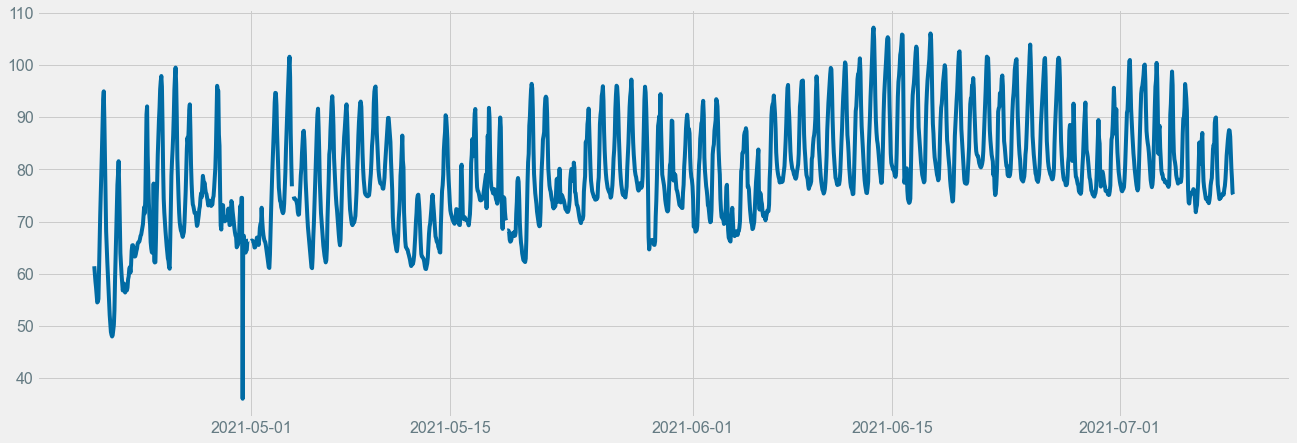

In [17]:
plt.rc('figure', figsize=(20, 7))
plt.style.use('tableau-colorblind10')
plt.rc('font', size=16)
plt.plot(hour_df.index, hour_df.farenheit)
plt.show()

In [18]:
hour_df.to_csv('hours.csv')

In [20]:
hour_df.shape

(1920, 20)

In [23]:
#monthly roll up
def all_months_daily_COSA_dataframe():
    sound_df = wrangle.wrangle_sound()
    sound_df = sound_df.set_index('DateTime')
    sound_df = sound_df.sort_index()
    flood_df = wrangle.clean_flood()
    flood_df = flood_df.set_index('datetime')
    weather_df = wrangle.wrangle_weather()
    air_df = wrangle.clean_air()
    air_df.datetime = pd.to_datetime(air_df.datetime)
    air_df = air_df.set_index('datetime')
    air_df = air_df.sort_index()
    weather_month_df = weather_df.resample('M', on='datetime').mean()
    flood_month_df = flood_df.resample('M').mean()
    sound_month_df = sound_df.resample('M').mean()
    air_month_df = air_df.resample('M').mean().drop(columns = ['hour', 'weekday', 'CO_24hr', 'Pm_25_24hr', 'Pm_10_24hr'])
    air2_5 = air_df.drop(air_df.columns.difference(['Pm2_5', 'AQI_pm2_5']), 1)
    air10 = air_df.drop(air_df.columns.difference(['Pm10', 'AQI_pm10']), 1)
    airCO = air_df.drop(air_df.columns.difference(['CO', 'AQI_CO']), 1)
    series2_5 = air2_5.resample('M').max().rename(columns = {'AQI_pm2_5': 'most_hazardous_pm2.5_level'})['most_hazardous_pm2.5_level']
    series10 = air10.resample('M').max().rename(columns = {'AQI_pm10': 'most_hazardous_pm10_level'})['most_hazardous_pm10_level']
    seriesCO = airCO.resample('M').max().rename(columns = {'AQI_CO': 'most_hazardous_CO_level'})['most_hazardous_CO_level']
    hazards = pd.DataFrame(series2_5).join(series10).join(seriesCO)
    df = weather_month_df.join(air_month_df).join(hazards).join(sound_month_df).join(flood_month_df)
    df = df.round({'celsius': 2, 'farenheit': 2, 'humidity': 2, 'dewpoint_celsius': 2, 'dewpoint_farenheit': 2,
          'pressure': 2, 'NoiseLevel_db': 2, 'sensor_to_water_feet': 2, 'sensor_to_water_meters': 2,
          'sensor_to_ground_feet': 2, 'sensor_to_ground_meters': 2, 'flood_depth_feet': 2,
          'flood_depth_meters': 2})
    return df

In [24]:
months = all_months_daily_COSA_dataframe()

In [25]:
months.head()

,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,Pm1_0,Pm2_5,Pm10,SO2,...,most_hazardous_pm2.5_level,most_hazardous_pm10_level,most_hazardous_CO_level,NoiseLevel_db,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
datetime,,,,,,,,,,,,,,,,,,,,,
2021-04-30,21.58,70.83,70.67,14.83,58.69,976.76,13.164642,17.171104,21.216077,0.001551,...,Hazardous,Unhealthy for Sensitive Groups,Hazardous,66.27,9.59,2.92,-270.75,-277.50,-280.34,-280.42
2021-05-31,24.92,76.84,75.39,15.47,52.78,762.00,7.343061,13.468934,10.289186,0.000649,...,Hazardous,Moderate,Hazardous,63.96,-178.02,-180.39,-746.19,-748.54,-568.17,-568.15
2021-06-30,28.75,83.73,69.96,18.29,59.59,813.58,36.301497,11.129281,13.774132,0.000000,...,Unhealthy,Moderate,Moderate,63.51,3.45,1.05,-746.90,-749.24,-750.35,-750.29
2021-07-31,27.71,81.89,76.37,18.83,60.54,813.44,8.695139,17.873796,7.830327,0.000000,...,Unhealthy for Sensitive Groups,Good,Good,63.18,3.50,1.07,-746.37,-748.71,-749.86,-749.78


In [26]:
months.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2021-04-30 to 2021-07-31
Freq: M
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   celsius                     4 non-null      float64 
 1   farenheit                   4 non-null      float64 
 2   humidity                    4 non-null      float64 
 3   dewpoint_celsius            4 non-null      float64 
 4   dewpoint_farenheit          4 non-null      float64 
 5   pressure                    4 non-null      float64 
 6   Pm1_0                       4 non-null      float64 
 7   Pm2_5                       4 non-null      float64 
 8   Pm10                        4 non-null      float64 
 9   SO2                         4 non-null      float64 
 10  O3                          4 non-null      float64 
 11  CO                          4 non-null      float64 
 12  NO2                         4 non-null      float64 


In [27]:
weather = wrangle.wrangle_weather()

In [28]:
weather.head()

,datetime,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,time,date,weather,wind,visibility
DateTime,,,,,,,,,,,,
2021-04-20,2021-04-20 00:03:06,17.0,62.0,49.0,6.200402,43.160724,979.0,11:51 PM,4/19/2021,Passing clouds.,8 mph,10 mi
2021-04-20,2021-04-20 00:07:47,17.0,62.0,49.0,6.200402,43.160724,979.0,11:51 PM,4/19/2021,Passing clouds.,8 mph,10 mi
2021-04-20,2021-04-20 00:16:47,16.0,62.0,49.0,5.281568,41.506822,979.0,11:51 PM,4/19/2021,Passing clouds.,8 mph,10 mi
2021-04-20,2021-04-20 00:27:06,16.0,61.0,50.0,5.572908,42.031234,979.0,11:51 PM,4/19/2021,Passing clouds.,8 mph,10 mi
2021-04-20,2021-04-20 00:03:06,17.0,62.0,48.0,5.901560,42.622809,980.0,11:51 PM,4/19/2021,Passing clouds.,8 mph,10 mi


In [29]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125956 entries, 2021-04-20 00:00:00 to 2021-07-09 00:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   datetime            125956 non-null  datetime64[ns]
 1   celsius             125956 non-null  float64       
 2   farenheit           125956 non-null  float64       
 3   humidity            125956 non-null  float64       
 4   dewpoint_celsius    125956 non-null  float64       
 5   dewpoint_farenheit  125956 non-null  float64       
 6   pressure            125956 non-null  float64       
 7   time                125956 non-null  object        
 8   date                125956 non-null  object        
 9   weather             125956 non-null  object        
 10  wind                125956 non-null  object        
 11  visibility          125956 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory u

In [30]:
saws = wrangle.wrangle_saws()

In [31]:
saws.head()

,zipcode,location,year_month,gallons_consumed
Record #,,,,
274262,78229,ACCOLON DR,17-JAN,6733
274263,78229,ACCOLON DR,17-JAN,5237
274264,78229,ACCOLON DR,17-JAN,2992
274265,78229,ACCOLON DR,17-JAN,0
274266,78229,ACCOLON DR,17-JAN,4489
